# Weekly project
This weeks weekly project is a continuation of last weeks exercises.

You are to make a handwritten number classifier. Where we will be using the [mnist dataset](https://en.wikipedia.org/wiki/MNIST_database).

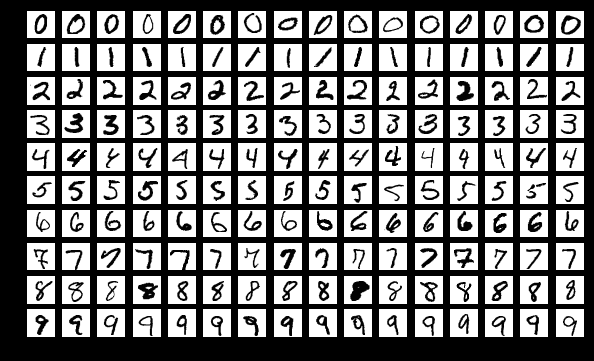

**Create a program that given an image from the mnist dataset.**
- You are free to use any algorithm you want to achieve this.
- It should be able to given a number classify what number it is.
- Accuracy should at least be 80%

If you decide to use a svm make sure you also use dimensionality reduction. SVM of the full mnist dataset will take around 4-8 hours depending on your pc.



**Challange:**
- Try to reach 98% accuracy.
- Try to classify faces with the labeled wild faces dataset [lwf](http://vis-www.cs.umass.edu/lfw/)
```{Python}
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
```

# Imports

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Dataset

In [51]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
images = mnist.data.to_numpy()
targets = mnist.target.astype(int)

# Show some digits

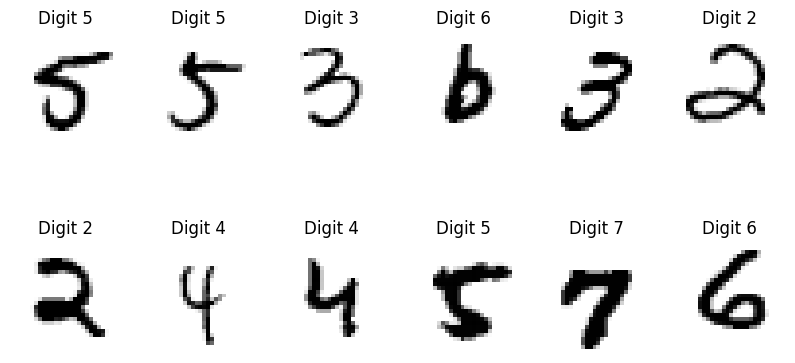

In [52]:
def show_some_digits(images, targets, sample_size=12, title_text='Digit {}'):
    nsamples = sample_size
    rand_idx = np.random.choice(images.shape[0], nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))

    plt.figure(figsize=(10, 5))
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(2, 6, index + 1)
        plt.axis('off')
        plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))
    plt.show()

show_some_digits(images, targets)

In [53]:
# Prepare data for training
X_train, X_test, y_train, y_test = train_test_split(
    images, targets, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (56000, 784)
Test set size: (14000, 784)


In [54]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Reduce dimensionality with PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("Number of components selected:", pca.n_components_)

Number of components selected: 330


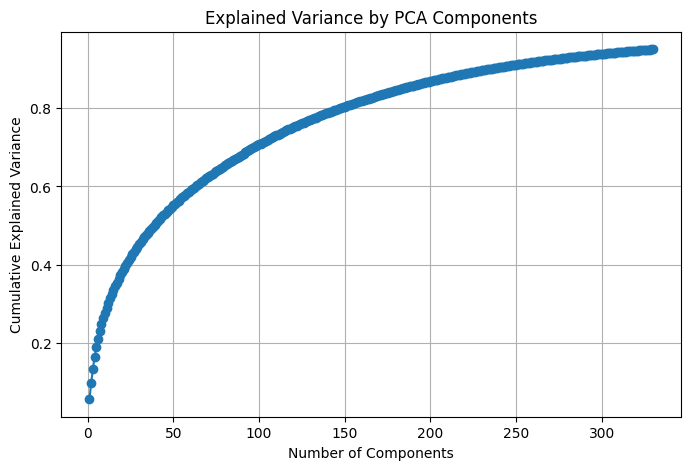

In [56]:
# Visualize explained variance
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(explained_variance)) + 1, explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [57]:
# Train SVM classifier
classifier = svm.SVC(kernel='rbf', gamma='scale', C=1.0)
classifier.fit(X_train_pca, y_train)

SVC()

In [58]:
# Evaluate classifier
y_pred = classifier.predict(X_test_pca)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

Classification accuracy: 0.9644285714285714


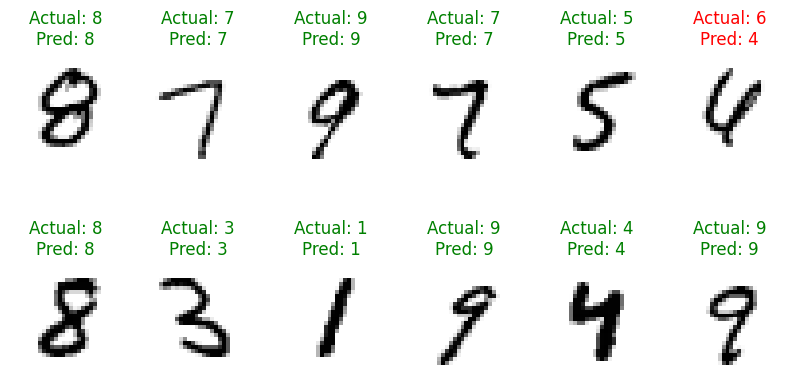

In [59]:
# Visualize predictions
def show_predictions(images, actual, predicted, sample_size=12):
    images = np.array(images)
    actual = np.array(actual)
    predicted = np.array(predicted)
    nsamples = sample_size
    rand_idx = np.random.choice(images.shape[0], nsamples, replace=False)
    images_and_labels = list(zip(images[rand_idx], actual[rand_idx], predicted[rand_idx]))

    plt.figure(figsize=(10, 5))
    for index, (image, actual, pred) in enumerate(images_and_labels):
        plt.subplot(2, 6, index + 1)
        plt.axis('off')
        plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(f'Actual: {actual}\nPred: {pred}', color='green' if actual == pred else 'red')
    plt.show()

show_predictions(X_test, y_test, y_pred)